In [1]:
import os
import datetime
import time
import re
import glob

import requests
import numpy as np
import pandas as pd

from bs4 import BeautifulSoup
import urllib.request as req

In [152]:
url = 'https://www.vleague.jp/form/b/26887'

In [153]:
html = requests.get(url)
table = pd.read_html(html.text)

## テーブルの各内容
- 0：セット＆点数
- 1：スタッフ(真ん中)＆スタメン背番号(両サイド)
- 2：スタッフ＆通算勝敗・ポイント
- 3：チーム各種技術スタッツ(アタック決定率など)
- 4&5：個人スタッツ

In [154]:
table[0]

,チーム,セット,ポイント,1,2,3,4,5,合計
0,岡山シーガルズ,2,1,30,24,25,13,11,103
1,埼玉上尾メディックス,3,2,28,26,23,25,15,117
2,試合時間,試合時間,試合時間,0:32,0:34,0:31,0:22,0:15,2:14


In [155]:
home, away = table[0].loc[0, 'チーム'], table[0].loc[1, 'チーム']
print(home, away)

岡山シーガルズ 埼玉上尾メディックス


In [156]:
t_stats = table[3]
print(t_stats.shape)

(7, 11)


In [157]:
home_stats, away_stats = [], []
# 優劣を色分け
home_excel, away_excel = [], []
# グラフの為の変更した値
home_stats_v, away_stats_v = [], []
for i in range(t_stats.shape[0]-2):
    h_stats = t_stats.iloc[i,1]
    a_stats = t_stats.iloc[i,9]
    if i == 2:
        h_stats_v, a_stats_v = h_stats*20, a_stats*20
    elif i == 3:
        h_stats_v, a_stats_v = h_stats*5, a_stats*5
    else:
        h_stats_v, a_stats_v = h_stats, a_stats
#     print(h_stats, a_stats)
    if h_stats > a_stats:
        h_excel, a_excel = 'r', 'b'
    elif h_stats == a_stats:
        h_excel, a_excel = 'r', 'r'
    else:
        h_excel, a_excel = 'b', 'r'
    home_excel.append(h_excel)
    away_excel.append(a_excel)
    
    home_stats.append(h_stats)
    away_stats.append(a_stats)
    home_stats_v.append(h_stats_v)
    away_stats_v.append(a_stats_v)

print(home_stats, away_stats)
print(home_stats_v, away_stats_v)
print(home_excel, away_excel)

[30.3, 0.0, 1.0, 9.7, 75.7] [39.3, 22.2, 2.2, 2.6, 62.4]
[30.3, 0.0, 20.0, 48.5, 75.7] [39.3, 22.2, 44.0, 13.0, 62.4]
['b', 'b', 'b', 'r', 'r'] ['r', 'r', 'r', 'b', 'b']


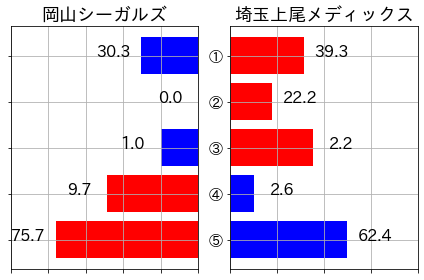

In [160]:
from matplotlib import pyplot as plt
# columns = ['アタック\n決定率', 'バックアタック\n決定率', 'ブロック\nセット平均', 'サーブ\n効果率', 'サーブレシーブ\n成功率']
columns = ['①', '②', '③', '④', '⑤']

fig, (ax1, ax2) = plt.subplots(1, 2)

# ax1.plot(x, y)
ax1.barh(columns, home_stats_v, color=home_excel)
# ax1.set_yticklabels(columns, fontsize=16)
ax1.set_title(home, fontsize=18)
ax1.tick_params(labelleft=False, labelbottom=False)
ax1.set_xlim(0, 100)
ax1.grid(True)
[ax1.text(home_stats_v[i]+15, i, home_stats[i], horizontalalignment='center', fontsize=16) for i in range(5)]

ax2.barh(columns, away_stats_v, color=away_excel)
# ax2.set_yticklabels(columns, fontsize=16)
ax2.set_title(away, fontsize=18)
ax2.tick_params(labelright=False, labelbottom=False, labelsize=14)
ax2.set_xlim(0, 100)
ax2.grid(True)
[ax2.text(away_stats_v[i]+15, i, away_stats[i], horizontalalignment='center', fontsize=16) for i in range(5)]

ax1.invert_xaxis()
ax1.invert_yaxis()
ax2.invert_yaxis()


fig.tight_layout()
plt.savefig('team_stats.png', facecolor='white')
plt.show()

In [69]:
import japanize_matplotlib

In [184]:
headers = {"User-Agent": "Mozilla/5.0"}
url = 'https://www.vleague.jp//form/b/27010'
html = requests.get(url, headers=headers)
check = html.text
# check

In [185]:
data = pd.read_html(check)

In [189]:
data[2]

,0,1,2
0,河本 昭義,監督,酒井 新悟
1,吉田 啓佑,コーチ,豊暉原 峻
2,6勝14敗,通算,11勝6敗
3,20,ポイント,34


In [177]:
request = req.Request(url, headers=headers)
response = req.urlopen(request)
parse_html = BeautifulSoup(response, 'html.parser')
check = parse_html.text
match_num = parse_html.find(
            'p', class_='match_no left').find('span').text

In [191]:
match_num

'422'

In [192]:
data[0]

,チーム,セット,ポイント,1,2,3,4,5,合計
0,岡山シーガルズ,3,3,25,20,29,25,NaN,99
1,久光スプリングス,1,0,19,25,27,21,NaN,92
2,試合時間,試合時間,試合時間,0:25,0:29,0:33,0:28,NaN,1:55
